In [97]:
!pip install requests
!pip install html5lib
!pip install bs4

In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.neural_network import MLPRegressor,MLPClassifier
from sklearn.model_selection import train_test_split



In [120]:
!pip install pandas_datareader

In [100]:
pip install beautifulsoup4

Note: you may need to restart the kernel to use updated packages.


In [121]:
!pip install vaderSentiment


In [84]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

def getLiveUpdates():
    headers = {
        "User-Agent":
        "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/101.0.4951.54 Safari/537.36"
    }
    try:
        response = requests.get(
            "https://www.livemint.com/market/live-blog/tata-power-share-price-today-latest-live-updates-on-24-may-2024-11716517804579.html", headers=headers
        )
        response.raise_for_status()  # Raise an error for bad status codes
        soup = BeautifulSoup(response.content, "html.parser")

        # Extracting the title of the webpage
        title_elem = soup.find("h2", class_="liveTitle")
        title = title_elem.get_text(strip=True) if title_elem else "No Title Available"
        print("Title:", title)
        print("="*50)

        live_updates = []

        for div in soup.find_all("div", class_="liveSec"):
            timestamp_elem = div.find("span", class_="timeStamp")
            content_elem = div.find("p")

            Date = timestamp_elem.get_text(strip=True) if timestamp_elem else "No Timestamp Available"
            content = content_elem.get_text(strip=True) if content_elem else "No Content Available"

            live_updates.append(
                {
                    "Title": title,
                    "Date": Date,  # Changed "Timestamp" to "Date"
                    "Content": content,
                }
            )

        for update in live_updates:
            print("Title:", update["Title"])
            print("Date:", update["Date"])  # Changed "Timestamp" to "Date"
            print("Content:", update["Content"])
            print("="*50)  # Separating each live update with a line

        # Save data to CSV
        save_to_csv(live_updates)

    except requests.RequestException as e:
        print("Error fetching data:", e)


def save_to_csv(live_updates):
    """
    Save live updates to CSV file.

    Parameters:
    - live_updates (list of dict): List containing dictionaries with live update data.
    """
    try:
        # Read the existing CSV file if it exists, otherwise create an empty DataFrame
        try:
            combined_df = pd.read_csv('tatapowernews.csv')
        except FileNotFoundError:
            combined_df = pd.DataFrame()

        # Convert the live updates to a DataFrame
        new_df = pd.DataFrame(live_updates)

        # Check if the DataFrame is empty
        if combined_df.empty:
            combined_df = new_df
        else:
            # Check for duplicate entries based on content
            new_content = set(new_df['Content'])
            existing_content = set(combined_df['Content'])
            unique_content = new_content - existing_content

            # Append only new unique entries to the existing DataFrame
            if unique_content:
                new_unique_entries = new_df[new_df['Content'].isin(unique_content)]
                combined_df = pd.concat([combined_df, new_unique_entries], ignore_index=True)
                print("New unique entries added to tatapowernews.csv")
            else:
                print("No new unique entries to add")

        # Save the updated DataFrame to a CSV file
        combined_df.to_csv('tatapowernews.csv', index=False)

    except Exception as e:
        print("Error:", e)

# Run the function to scrape live updates and save them to CSV
getLiveUpdates()


Title: Tata Power Share Price Today Live: Hourly Price Movement Update
Title: Tata Power Share Price Today Live: Hourly Price Movement Update
Date: 24 May 2024, 01:33:02 PM IST
Content: Tata Power Share Price Today Live: Tata Power reached a peak of 452.9 and a low of 449.3 in the previous trading hour. During the last hour, the stock price exceeded both the hourly resistances of 450.1 and 450.9, suggesting strong bullish sentiment. Traders may want to consider implementing trailing stop losses to safeguard their profits.The hourly support and resistance levels to watch out in the next hour are mentioned below.
Title: Tata Power Share Price Today Live: Hourly Price Movement Update
Date: 24 May 2024, 01:13:40 PM IST
Content: Tata Power Share Price Today Live: An increase in futures price and a decrease in open interest for Tata Power indicate that the current upward trend may be slowing down, possibly indicating a potential peak or reversal in the stock's trajectory in the near future.


In [ ]:
# manually news entries









import pandas as pd

def save_to_csv(live_updates, filename):
    """
    Save live updates to CSV file.

    Parameters:
    - live_updates (list of dict): List containing dictionaries with live update data.
    - filename (str): Name of the CSV file to save.
    """
    try:
        # Read the existing CSV file if it exists, otherwise create an empty DataFrame
        try:
            combined_df = pd.read_csv(filename)
        except FileNotFoundError:
            combined_df = pd.DataFrame()

        # Convert the live updates to a DataFrame
        new_df = pd.DataFrame(live_updates)

        # Check if the DataFrame is empty
        if combined_df.empty:
            combined_df = new_df
        else:
            # Check for duplicate entries based on both content and title
            new_unique_entries = []
            for index, row in new_df.iterrows():
                if (row['Title'] not in combined_df['Title'].values) and (row['Content'] not in combined_df['Content'].values):
                    new_unique_entries.append(row)

            if new_unique_entries:
                combined_df = pd.concat([combined_df, pd.DataFrame(new_unique_entries)], ignore_index=True)
                print("New unique entries added to", filename)
                print("Entry is entered into the dataset.")
            else:
                print("No new unique entries to add")
                print("Entry is not entered into the dataset.")

        # Save the updated DataFrame to a CSV file
        combined_df.to_csv(filename, index=False)

    except Exception as e:
        print("Error:", e)


def manually_set_live_updates():
    """
    Manually set Title, Date, and Content.
    """
    title = '''

 Tata Power as of May 16, 2024:
    '''
    date = " 16 May 2024   "
    content = '''

Tata Power shares gained 0.03% and were trading at Rs 431.6 at 12:22 PM (IST) on Thursday. The Sensex rose by 235.52 points to 73222.55. The stock had closed at Rs 431.45 in the previous session. The 52-week high price of the stock was Rs 464.3, and the 52-week low was Rs 201.75. The total traded volume on the counter till 12:22 PM (IST) stood at 603093 shares with a turnover of Rs 26.03 crore.

The stock's trailing 12-month EPS was Rs 11.57 per share, and the price-to-book value was 3.89. The Beta value of the stock was 1.73.

Promoters held 46.86 per cent stake in the company as of 31-Mar-2024, while FIIs owned 9.45 per cent and DIIs 5.59 per cent.

The RSI of the stock stood at 53.46.
    '''

    live_updates = [
        {
            "Title": title,
            "Date": date,
            "Content": content
        }
    ]

    # Save data to CSV with the new filename
    save_to_csv(live_updates, 'tatapowernews.csv')

# Run the function to manually set live updates and save them to CSV
manually_set_live_updates()


New unique entries added to tatapowernews.csv
Entry is entered into the dataset.


In [ ]:
#TATAPOWER.NS

In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime, timedelta
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import joblib
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Load news data
news_df = pd.read_csv('tatapowernews.csv')
print("News data loaded successfully")
print(news_df.head())


News data loaded successfully
                                               Title       Date  \
0  Tata Power share price NSE Live : Return metri...  10-May-24   
1  Tata Power share price Today : Financial perfo...  10-May-24   
2  Tata Power share price live: Consensus analyst...  10-May-24   
3  Big Crash coming in Tata Power stock? Analysts...  10-May-24   
4  Q4 Results: Tata Power posts 15% jump in profi...  10-May-24   

                                             Content  
0  \n    Tata Power's return on equity (ROE) for ...  
1  Tata Power has shown an EPS growth of 51.54% a...  
2  \n    The analyst recommendation trend is show...  
3  \n    Tata Power shares clocked a series of re...  
4  \n    Tata Power reported a consolidated net p...  


In [124]:
# Function to parse date and handle timezone warnings
def parse_date(date_str):
    try:
        return pd.to_datetime(date_str, errors='coerce')
    except Exception as e:
        print(f"Error parsing date: {e}")
        return pd.NaT

# Apply the date parsing function
news_df['Date'] = news_df['Date'].apply(parse_date)

# Drop rows with invalid dates
news_df = news_df.dropna(subset=['Date'])

print("Date parsing and cleaning done")
print(news_df.head())


Date parsing and cleaning done
                                               Title       Date  \
0  Tata Power share price NSE Live : Return metri... 2024-05-10   
1  Tata Power share price Today : Financial perfo... 2024-05-10   
2  Tata Power share price live: Consensus analyst... 2024-05-10   
3  Big Crash coming in Tata Power stock? Analysts... 2024-05-10   
4  Q4 Results: Tata Power posts 15% jump in profi... 2024-05-10   

                                             Content  
0  \n    Tata Power's return on equity (ROE) for ...  
1  Tata Power has shown an EPS growth of 51.54% a...  
2  \n    The analyst recommendation trend is show...  
3  \n    Tata Power shares clocked a series of re...  
4  \n    Tata Power reported a consolidated net p...  


C:\Users\raghw\AppData\Local\Temp\ipykernel_31592\4166782687.py:4: FutureWarning: Parsed string "21 Mar 2024, 06:30:47 PM IST" included an un-recognized timezone "IST". Dropping unrecognized timezones is deprecated; in a future version this will raise. Instead pass the string without the timezone, then use .tz_localize to convert to a recognized timezone.
  return pd.to_datetime(date_str, errors='coerce')
C:\Users\raghw\AppData\Local\Temp\ipykernel_31592\4166782687.py:4: FutureWarning: Parsed string "21 Mar 2024, 06:16:40 PM IST" included an un-recognized timezone "IST". Dropping unrecognized timezones is deprecated; in a future version this will raise. Instead pass the string without the timezone, then use .tz_localize to convert to a recognized timezone.
  return pd.to_datetime(date_str, errors='coerce')
C:\Users\raghw\AppData\Local\Temp\ipykernel_31592\4166782687.py:4: FutureWarning: Parsed string "21 Mar 2024, 05:30:44 PM IST" included an un-recognized timezone "IST". Dropping unre

In [125]:
# Initialize sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to get sentiment score
def get_sentiment(text):
    try:
        sentiment = analyzer.polarity_scores(text)
        return sentiment['compound']
    except Exception as e:
        print(f"Error analyzing sentiment: {e}")
        return 0

# Apply sentiment analysis to the Content column
news_df['Sentiment'] = news_df['Content'].apply(get_sentiment)

print("Sentiment analysis done")
print(news_df.head())

# Aggregate sentiment scores over 7-day windows
news_df.set_index('Date', inplace=True)
news_df = news_df.resample('7D').mean(numeric_only=True).reset_index()

print("Sentiment aggregation done")
print(news_df.head())


Sentiment analysis done
                                               Title       Date  \
0  Tata Power share price NSE Live : Return metri... 2024-05-10   
1  Tata Power share price Today : Financial perfo... 2024-05-10   
2  Tata Power share price live: Consensus analyst... 2024-05-10   
3  Big Crash coming in Tata Power stock? Analysts... 2024-05-10   
4  Q4 Results: Tata Power posts 15% jump in profi... 2024-05-10   

                                             Content  Sentiment  
0  \n    Tata Power's return on equity (ROE) for ...     0.3400  
1  Tata Power has shown an EPS growth of 51.54% a...     0.9062  
2  \n    The analyst recommendation trend is show...    -0.5859  
3  \n    Tata Power shares clocked a series of re...     0.8625  
4  \n    Tata Power reported a consolidated net p...     0.9788  
Sentiment aggregation done
        Date  Sentiment
0 2023-05-10     0.9924
1 2023-05-17        NaN
2 2023-05-24        NaN
3 2023-05-31        NaN
4 2023-06-07        NaN


In [132]:
# Fetch stock data
current_date = datetime.today().strftime('%Y-%m-%d')
stock_df = yf.download('TATAPOWER.NS', start='2023-08-29', end=current_date, progress=False)
stock_df.reset_index(inplace=True)

print("Stock data fetched successfully")
print(stock_df.head())

columns_to_drop = ['Adj Close', 'Volume']
stock_df.drop(columns=columns_to_drop, inplace=True)

print("Columns dropped successfully")
print(stock_df.head())

# Calculate support and resistance
def calculate_support_resistance(data, window=20):
    data['Support'] = data['Low'].rolling(window=window).min()
    data['Resistance'] = data['High'].rolling(window=window).max()
    return data

stock_df = calculate_support_resistance(stock_df)
print("Support and resistance calculated")
print(stock_df.head())


Stock data fetched successfully
        Date        Open        High         Low       Close   Adj Close  \
0 2023-08-29  245.000000  248.500000  244.949997  246.899994  246.899994   
1 2023-08-30  248.000000  250.500000  246.899994  247.350006  247.350006   
2 2023-08-31  248.649994  249.750000  244.250000  245.100006  245.100006   
3 2023-09-01  246.750000  255.949997  246.100006  255.350006  255.350006   
4 2023-09-04  257.950012  262.299988  255.100006  259.149994  259.149994   

     Volume  
0   7267365  
1   8228142  
2  11641155  
3  28052910  
4  18767431  
Columns dropped successfully
        Date        Open        High         Low       Close
0 2023-08-29  245.000000  248.500000  244.949997  246.899994
1 2023-08-30  248.000000  250.500000  246.899994  247.350006
2 2023-08-31  248.649994  249.750000  244.250000  245.100006
3 2023-09-01  246.750000  255.949997  246.100006  255.350006
4 2023-09-04  257.950012  262.299988  255.100006  259.149994
Support and resistance calculate

In [133]:
# Merge stock data with sentiment data
merged_df = pd.merge(stock_df, news_df[['Date', 'Sentiment']], on='Date', how='left')
merged_df['Sentiment'].fillna(method='ffill', inplace=True)

print("Merged dataframe created")
print(merged_df.head())


Merged dataframe created
        Date        Open        High         Low       Close  Support  \
0 2023-08-29  245.000000  248.500000  244.949997  246.899994      NaN   
1 2023-08-30  248.000000  250.500000  246.899994  247.350006      NaN   
2 2023-08-31  248.649994  249.750000  244.250000  245.100006      NaN   
3 2023-09-01  246.750000  255.949997  246.100006  255.350006      NaN   
4 2023-09-04  257.950012  262.299988  255.100006  259.149994      NaN   

   Resistance  Sentiment  
0         NaN        NaN  
1         NaN        NaN  
2         NaN        NaN  
3         NaN        NaN  
4         NaN        NaN  


C:\Users\raghw\AppData\Local\Temp\ipykernel_31592\2024439164.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_df['Sentiment'].fillna(method='ffill', inplace=True)
C:\Users\raghw\AppData\Local\Temp\ipykernel_31592\2024439164.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_df['Sentiment'].fillna(method='ffill', inplace=True)


In [135]:
# Feature engineering
merged_df['Previous_Close'] = merged_df['Close'].shift(1)
merged_df['Price_Change'] = merged_df['Close'] - merged_df['Previous_Close']
merged_df.dropna(inplace=True)

features = merged_df[['Previous_Close', 'Sentiment', 'Support', 'Resistance']]
target = merged_df['Close']

print("Features and target defined")
print(features.head())
print(target.head())

# Save features and target to CSV
features.to_csv('features.csv', index=False)
target.to_csv('target.csv', index=False)


Features and target defined
    Previous_Close  Sentiment     Support  Resistance
21      259.750000     0.2732  244.250000       276.5
22      258.049988     0.2732  246.100006       276.5
23      262.299988     0.2732  254.250000       276.5
24      263.950012     0.2732  253.500000       276.5
25      256.649994     0.2732  253.500000       276.5
21    258.049988
22    262.299988
23    263.950012
24    256.649994
25    257.799988
Name: Close, dtype: float64


In [136]:
# Model training and evaluation
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

mlp_model = MLPRegressor(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=500, random_state=42)
mlp_model.fit(X_train, y_train)
print("Model training complete")

# Save the model
joblib.dump(mlp_model, 'mlp_modelTATAPOWER.pkl')

# Load the model
loaded_model = joblib.load('mlp_modelTATAPOWER.pkl')

# Predictions and evaluation
predictions = loaded_model.predict(X_test)

mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R²): {r2}")


Model training complete
Mean Squared Error (MSE): 268.0849892510456
Mean Absolute Error (MAE): 13.447425870851683
R-squared (R²): 0.9502176305139062


In [137]:
# Future predictions
today = datetime.today().date()
next_seven_days_dates = [today + timedelta(days=i) for i in range(7)]

# Use the last 7 days of data as the starting point for predictions
last_7_days = merged_df.iloc[-7:][['Previous_Close', 'Sentiment', 'Support', 'Resistance']].values

predicted_close_prices = []
predicted_price_changes = []

for i in range(7):
    X_next_day = pd.DataFrame(last_7_days, columns=['Previous_Close', 'Sentiment', 'Support', 'Resistance'])
    next_day_close = mlp_model.predict(X_next_day.iloc[[-1]])[0]
    
    predicted_close_prices.append(next_day_close)
    
    price_change = next_day_close - last_7_days[-1][0]
    predicted_price_changes.append(price_change)

    last_7_days = np.append(last_7_days[1:], [[next_day_close, last_7_days[-1][1], last_7_days[-1][2], last_7_days[-1][3]]], axis=0)

predicted_df = pd.DataFrame({
    'Date': next_seven_days_dates,
    'Predicted_Close': predicted_close_prices,
    'Predicted_Price_Change': predicted_price_changes
})

predicted_df.to_csv('predicted_prices.csv', index=False)
print("Predicted prices saved to predicted_prices.csv")


Predicted prices saved to predicted_prices.csv


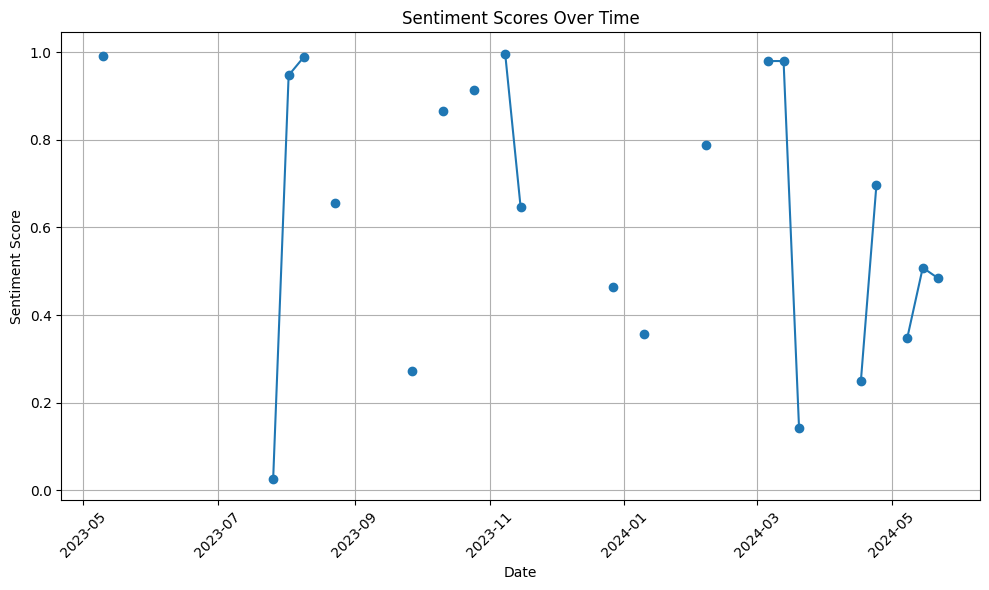

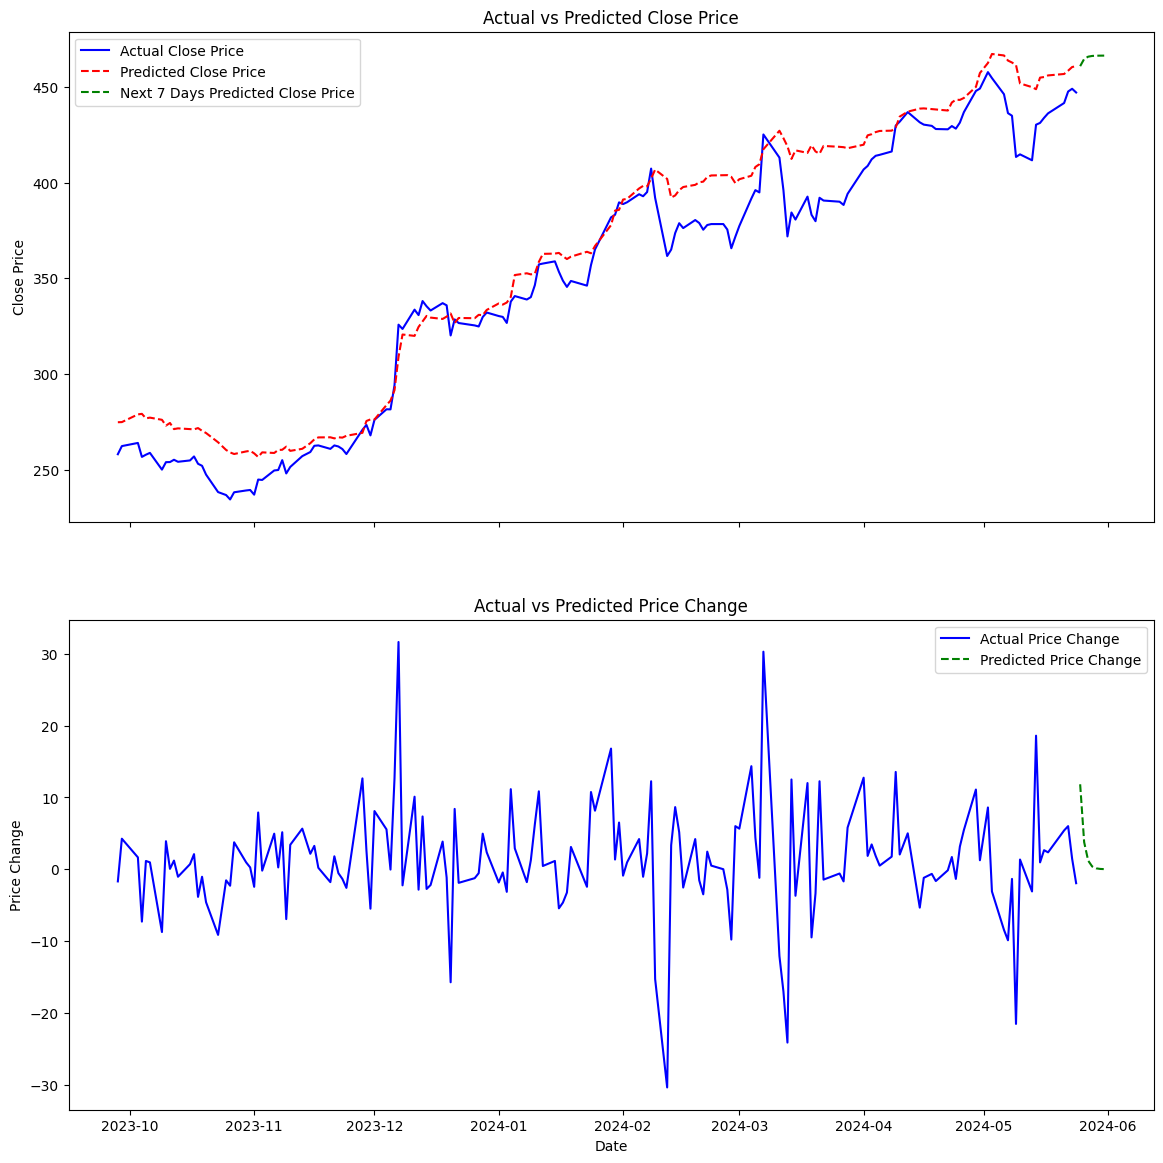

Results saved to newsexperiment_try.csv


In [138]:
# Visualization
plt.figure(figsize=(10, 6))
plt.plot(news_df['Date'], news_df['Sentiment'], marker='o', linestyle='-')
plt.title('Sentiment Scores Over Time')
plt.xlabel('Date')
plt.ylabel('Sentiment Score')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

merged_df['Actual_Price_Change'] = merged_df['Close'] - merged_df['Previous_Close']
predicted_close_df = merged_df[['Date', 'Close']].copy()
predicted_close_df['Predicted_Close'] = mlp_model.predict(merged_df[['Previous_Close', 'Sentiment', 'Support', 'Resistance']])

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 14), sharex=True)

ax1.plot(merged_df['Date'], merged_df['Close'], label='Actual Close Price', color='blue')
ax1.plot(predicted_close_df['Date'], predicted_close_df['Predicted_Close'], label='Predicted Close Price', color='red', linestyle='--')
ax1.plot(predicted_df['Date'], predicted_df['Predicted_Close'], label='Next 7 Days Predicted Close Price', color='green', linestyle='--')
ax1.set_ylabel('Close Price')
ax1.set_title('Actual vs Predicted Close Price')
ax1.legend()

ax2.plot(merged_df['Date'], merged_df['Actual_Price_Change'], label='Actual Price Change', color='blue')
ax2.plot(predicted_df['Date'], predicted_df['Predicted_Price_Change'], label='Predicted Price Change', color='green', linestyle='--')
ax2.set_xlabel('Date')
ax2.set_ylabel('Price Change')
ax2.set_title('Actual vs Predicted Price Change')
ax2.legend()

plt.show()

# Save results
merged_df.to_csv('newsexperiment_try.csv', index=False)
print("Results saved to newsexperiment_try.csv")
